In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import sklearn
import matplotlib

print("scikit-learn version:", sklearn.__version__)
print("pandas version:", pd.__version__)
print("numpy version:", np.__version__)
print("matplotlib version:", matplotlib.__version__)

scikit-learn version: 1.6.1
pandas version: 2.2.3
numpy version: 2.2.4
matplotlib version: 3.10.1


In [5]:
plt.style.use('fivethirtyeight')

df = pd.read_csv('data.csv')

Since this dataset has columns which are suffering from inconsistencies (the column names sometimes have spaces, and sometimes have underscores, also capitalized or short strings with spaces on feature values), we may normalize them by replacing all spaces with underscores and lowercase all letters.

In [6]:
# Replacing space with underscores on column
df.columns = df.columns.str.lower().str.replace(' ', '_')

# List contaning columns with type object
string_columns = list(df.dtypes[df.dtypes == 'object'].index)

# Replacing space with underscoes for string/object columns within list 
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ','_')

df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


### EDA

To begin EDA, keep in mind that we should always look at what the values of `y` look like, in this case the target is MSRP. Histogram is a common technique to figure out the distribution of the value respective to the frequency of value picked from a whole distribution.

In [7]:
for col in df.columns:
    print(col)
    print(f"Five random values from predictor {col}: {df[col].unique()[:5]}")
    print(f"How many unique values that the predictor {col} has? {df[col].nunique()}")
    print("------------------")

make
Five random values from predictor make: ['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
How many unique values that the predictor make has? 48
------------------
model
Five random values from predictor model: ['1_series_m' '1_series' '100' '124_spider' '190-class']
How many unique values that the predictor model has? 914
------------------
year
Five random values from predictor year: [2011 2012 2013 1992 1993]
How many unique values that the predictor year has? 28
------------------
engine_fuel_type
Five random values from predictor engine_fuel_type: ['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
How many unique values that the predictor engine_fuel_type has? 10
------------------
engine_hp
Five random values from predictor engine_hp: [335. 300. 230. 320. 172.]
How many unique values that the predictor engine_hp has? 356
------------------
engine_cylinders
Five random values from predictor engine_cylinders:

Now, to be able to acquire knowledge of how large the variation of `prices`, KDE plot or histogram, as much as many cases in continuous random variable, often used to give us insights in estimating the location.

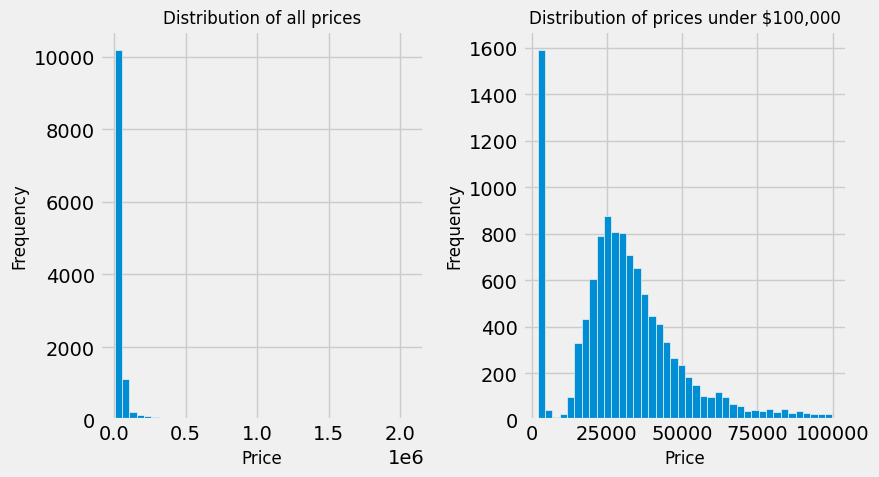

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(9, 5))

sns.histplot(df.msrp, bins=40, alpha=1, ax=axs[0])
axs[0].set_ylabel('Frequency', fontsize=12)
axs[0].set_xlabel('Price', fontsize=12)
axs[0].set_title('Distribution of all prices', fontsize=12)

sns.histplot(df.msrp[df.msrp < 100000], bins=40, alpha=1, ax=axs[1])
axs[1].set_ylabel('Frequency', fontsize=12)
axs[1].set_xlabel('Price', fontsize=12)
axs[1].set_title('Distribution of prices under $100,000', fontsize=12)

plt.tight_layout()
plt.show()

In [11]:
print(f"log1p (+1): {np.log1p([0,1,10,100,1000])}")
print(f"log : {np.log([0+1,1+1,10+1,100+1,1000+1])}")

log1p (+1): [0.         0.69314718 2.39789527 4.61512052 6.90875478]
log : [0.         0.69314718 2.39789527 4.61512052 6.90875478]


When feature scaling is used, it makes an adjustsment on values measured on different scales to a common scale. It does not change the overall shape of the variable distribution. 



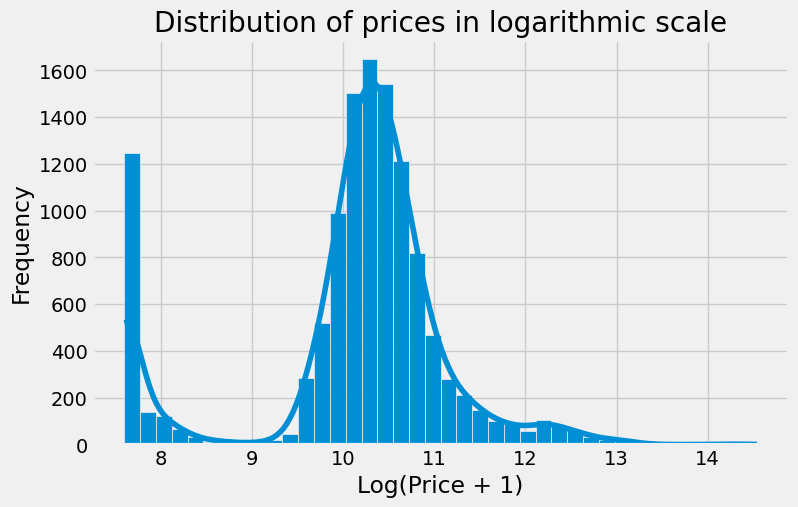

In [12]:
## The logarithm of zero is minus infinity, but the logarithm of one is zero. 
## If our values are all non-negative, by adding 1, we make sure that the transformed values do not go below zero.
log_price = np.log1p(df.msrp)
plt.figure(figsize=(8, 5))
sns.histplot(log_price, bins=40, alpha=1, kde=True)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices in logarithmic scale')

plt.show()

In [13]:
df.select_dtypes(include=['float64','int64']).columns

Index(['year', 'engine_hp', 'engine_cylinders', 'number_of_doors',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [14]:
plt.style.use('ggplot')

We may want to see how the measurement of continuous values are varied in different categories. Let's begin with exploring a "typical value" for categorical predictor, `transmission_type` and `driven_wheels`. We assume that the estimate mean is good enough to get the estimate of location. 

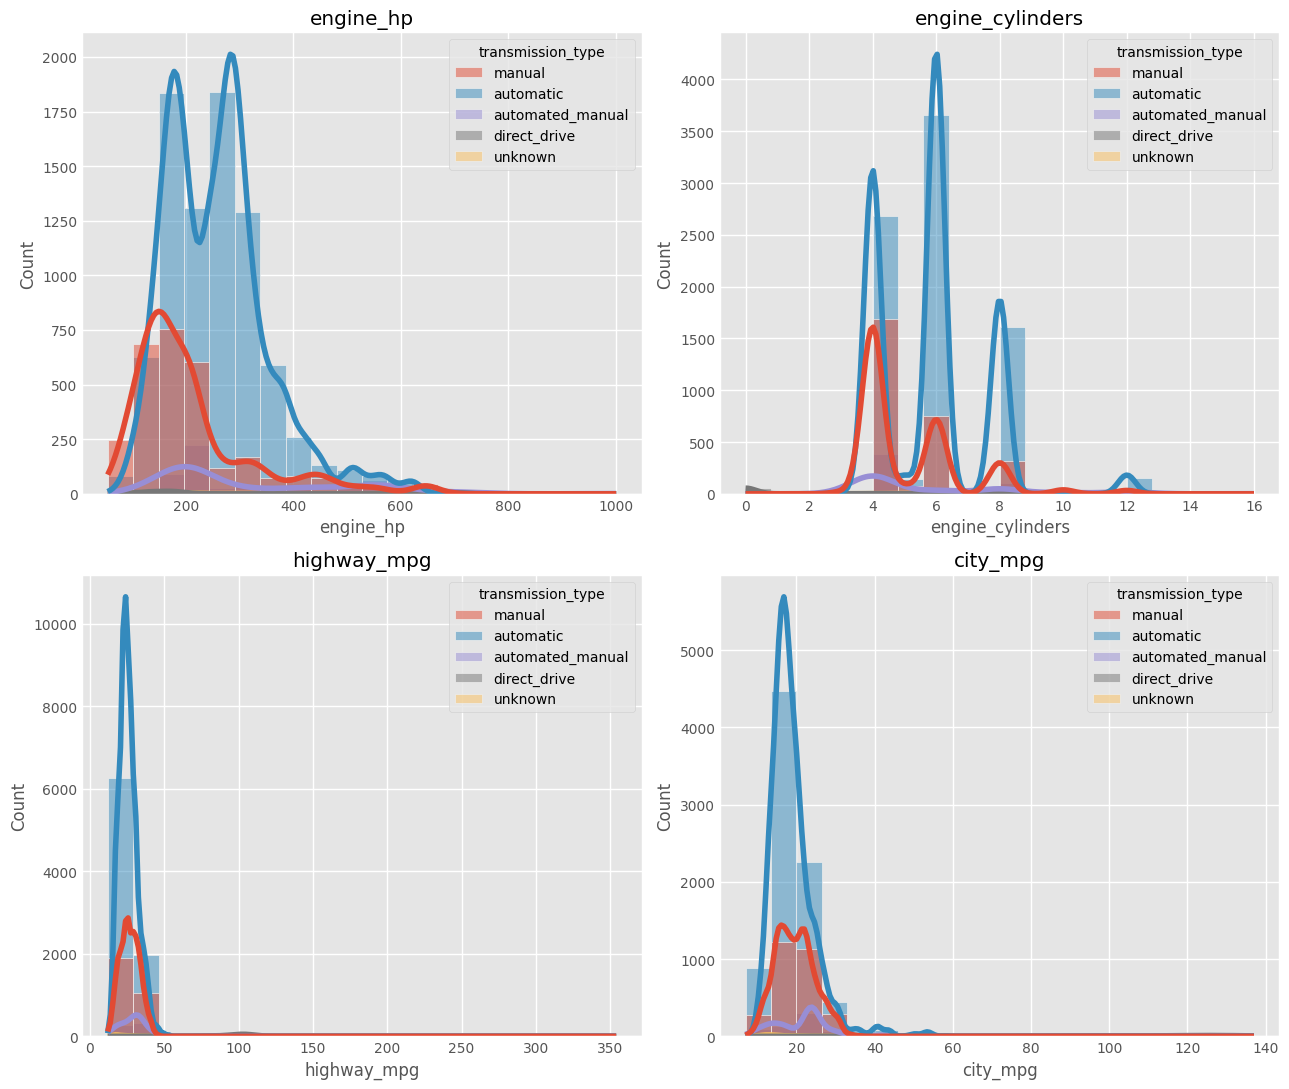

In [15]:
# Distribution of Numerical Features
numerical_features = ['engine_hp', 'engine_cylinders','highway_mpg', 'city_mpg']

plt.figure(figsize=(13, 11))

for feature in numerical_features:
    plt.subplot(2, 2, numerical_features.index(feature) + 1)
    sns.histplot(data=df, x=feature, bins=20, kde=True, hue="transmission_type")
    plt.title(feature)

plt.tight_layout()
plt.show()

Looks like KDE histogram plot could as far revealing the knowledge what we need for. No worries, there're some viable alternatives to complement the gap. Box plot is a good choice when you want to compare several categories.

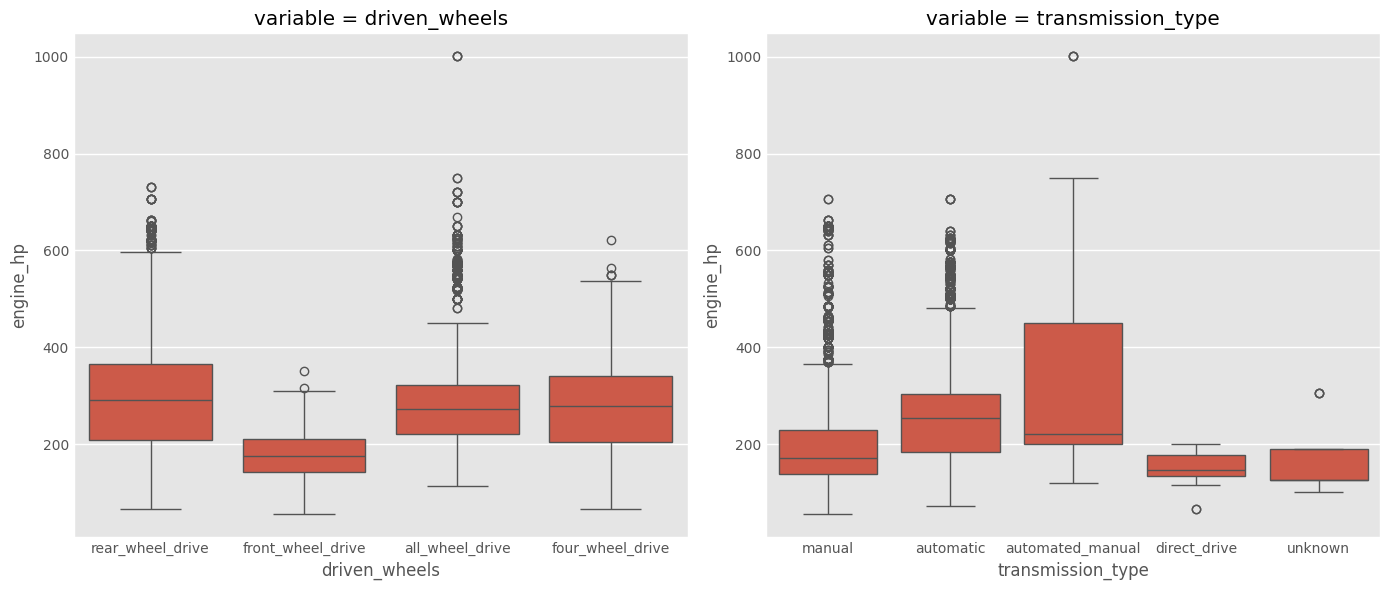

In [16]:
# Assuming your DataFrame is named 'df'
plt.figure(figsize=(14, 6))

for i, j in enumerate(["driven_wheels","transmission_type"]):
    plt.subplot(1,2, i+1)
    sns.boxplot(x=j, y="engine_hp", data=df)
    plt.title(f"variable = {j}")
    plt.ylabel("engine_hp")
plt.tight_layout()
plt.show()

Converting object-type variable `transmission_type`, `driven_wheels`, `vehicle_size`, `vehicle_style` into category.

In [17]:
df = df.astype({
    'transmission_type': 'category',
    'driven_wheels': 'category',
    'vehicle_size': 'category',
    'vehicle_style': 'category'
    })

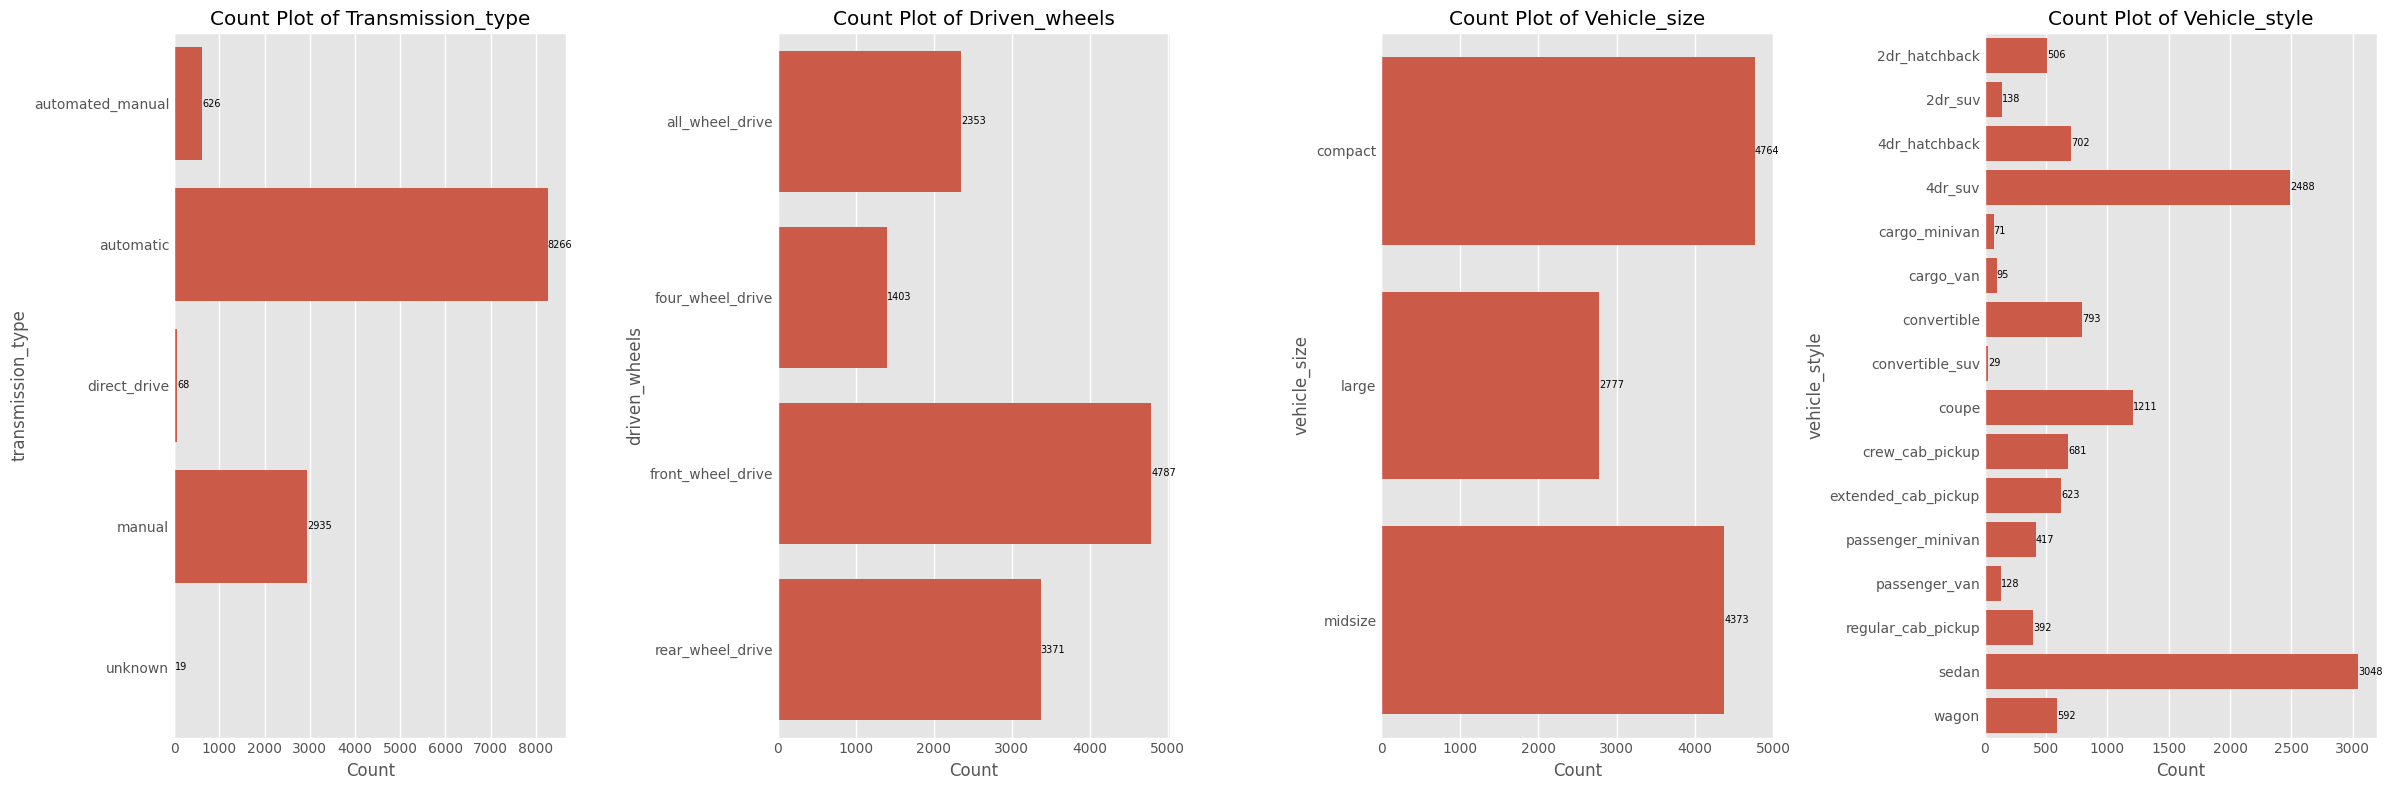

In [18]:
# Define the list of categorical columns to analyze
categorical_columns = list(df.select_dtypes(include=['category']).columns)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(24, 8))
axes = axes.ravel()  # Flatten the 2D array of axes

# Loop through each categorical column
for i, column in enumerate(categorical_columns):
    # sns.countplot(x=df[column], data=df, palette='bright', ax=axes[i], saturation=0.95)
    sns.barplot(df[column].value_counts(), orient="h", ax=axes[i])
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=7)
    axes[i].set_title(f'Count Plot of {column.capitalize()}')
    axes[i].set_ylabel(column.lower())
    axes[i].set_xlabel("Count")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

### Data Splitting

In [19]:
df_trunc = df[df['make'].isin(['bmw','audi','fiat','mercedes-benz','chrysler']) & (df['year'] > 2005)]
df_trunc.shape

(1065, 16)

In [20]:
np.random.seed(2)

n = len(df_trunc)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
## Take two portions out to make val and test compartments first
## So that the remaining part goes to training set
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

## Shuffle dataset respective to shuffled index
df_shuffled = df_trunc.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

Let’s get some insights by looking at the variable distributions and at the pairwise relationships between them

In [21]:
y_train_orig = df_train.msrp.values
y_val_orig = df_val.msrp.values
y_test_orig = df_test.msrp.values

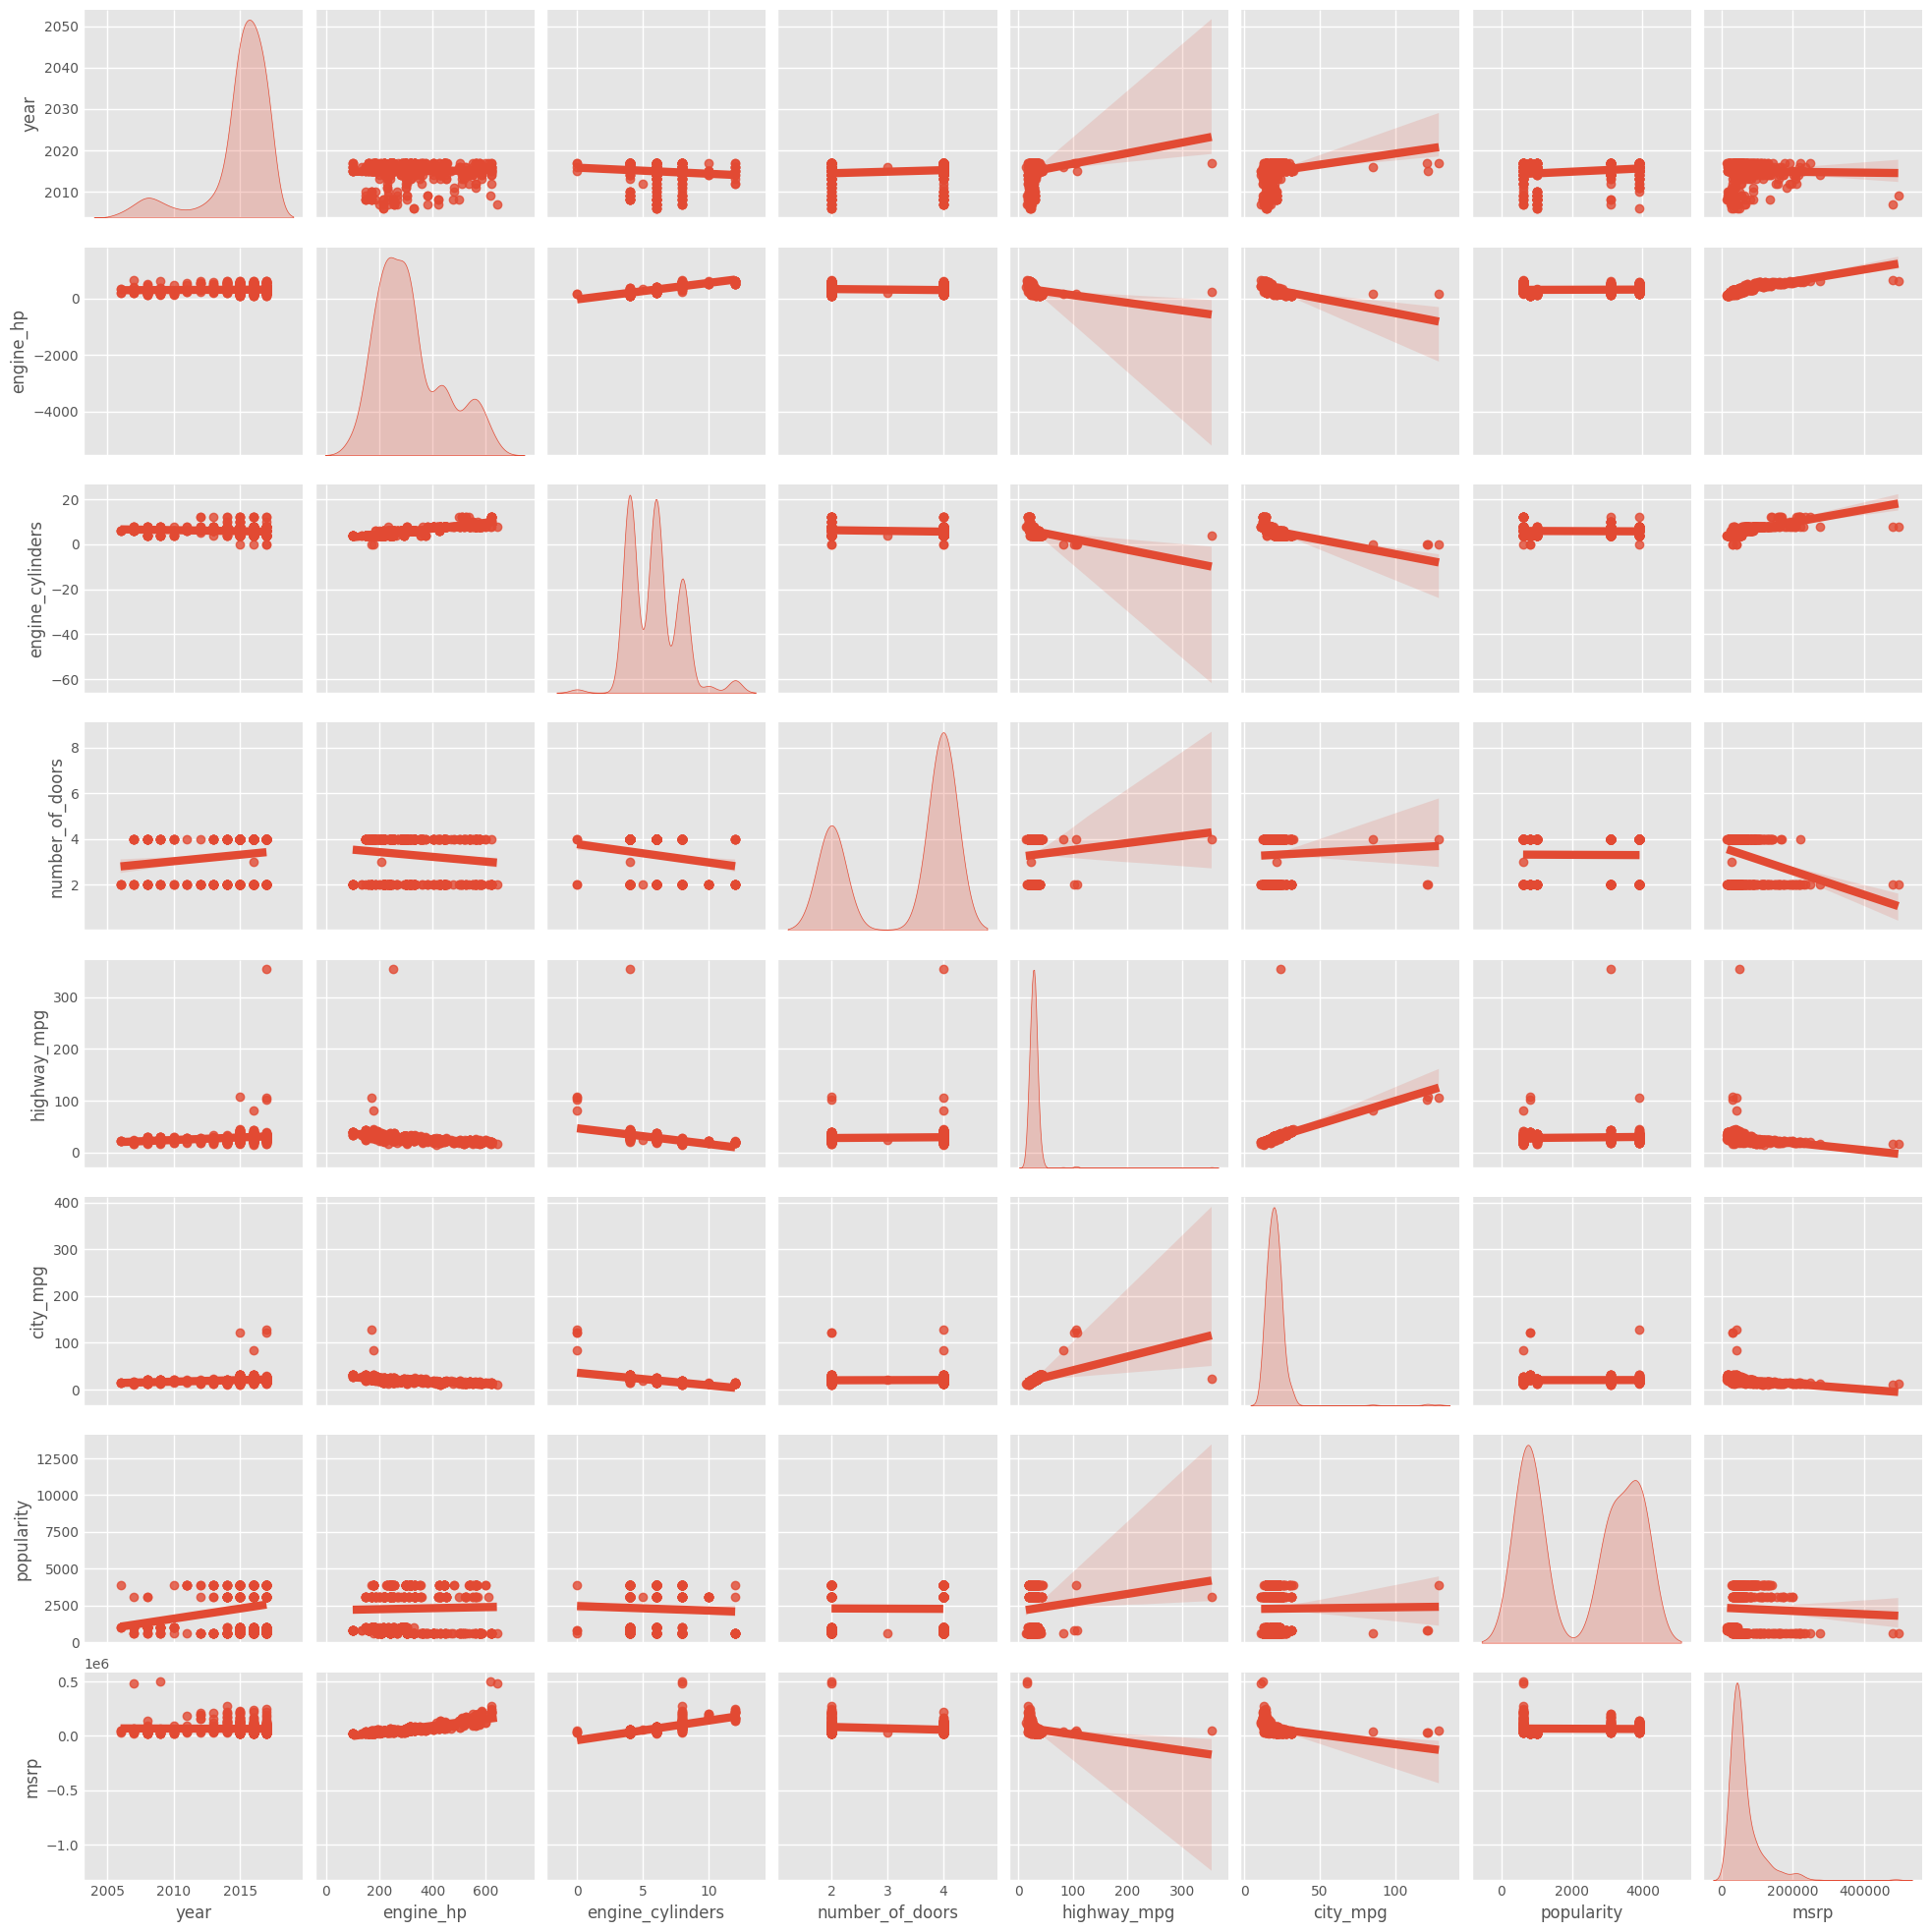

In [22]:
train_dataset = df_train.copy()
_ = sns.pairplot(train_dataset, kind="reg", diag_kind="kde")

The distribution of target variable, msrp, shows a long tail. We should take the logarithm that turns into an approximate normal (gaussian) distribution. The msrp is steadily decreasing aver the length of both mpg. Both mpg are strongly linearly correlated. Meanwhile, both engine_hp and engine_cylinders share the positive correlation with msrp.

In [23]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

### Designing pipeline

In [24]:
# Define the threshold for unique values
threshold = 5

# Identify categorical columns with more than 5 unique values
columns_to_drop = [col for col in df_train.select_dtypes(include=['category','object']) if df_train[col].nunique() > threshold]
columns_to_drop

['model', 'engine_fuel_type', 'market_category', 'vehicle_style']

In [25]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

categorical_columns = list(filter(lambda i: i not in columns_to_drop, list(df_train.select_dtypes(include=['category','object']).columns)))
numerical_columns = list(df_train.select_dtypes(include=['float64','int64']).columns)

preprocessor = make_column_transformer(
    (SimpleImputer(strategy='median'), numerical_columns),
    (OneHotEncoder(drop="if_binary"), categorical_columns),
    remainder="passthrough",
    verbose_feature_names_out=False,  # avoid to prepend the preprocessor names
)

### Linear Ridge Regression

In [26]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import make_pipeline
import scipy as sp

model = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=Lasso(alpha=1e-4), func=np.log10, inverse_func=sp.special.exp10
    ),
)

In [27]:
df_train = df_train.drop(columns_to_drop, axis=1)
df_train.isna().sum()

make                 0
year                 0
engine_hp            3
engine_cylinders     0
transmission_type    0
driven_wheels        0
number_of_doors      0
vehicle_size         0
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [28]:
model.fit(df_train, y_train_orig)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('simpleimputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['year', 'engine_hp',
                                                   'engine_cylinders',
                                                   'number_of_doors',
                                                   'highway_mpg', 'city_mpg',
                                                   'popularity']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['make', 'transmission_type',
                                                   'driven_wheels',
                                                   'vehicle_size'])],
                                   verbose_feature_names_out=False)),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log10'>,
                                            inverse_func=<ufunc 'exp10'>,
                                            regressor=Lasso(alpha=0.0001)))])

Check the performance of the computed model plotting its predictions on the test set and computing, for example, the median absolute error of the model.

In [29]:
from sklearn.metrics import PredictionErrorDisplay, median_absolute_error

df_val = df_val.drop(columns_to_drop, axis=1)
df_test = df_test.drop(columns_to_drop, axis=1)
df_test.dtypes

make                   object
year                    int64
engine_hp             float64
engine_cylinders      float64
transmission_type    category
driven_wheels        category
number_of_doors       float64
vehicle_size         category
highway_mpg             int64
city_mpg                int64
popularity              int64
dtype: object

In [30]:
mae_train = median_absolute_error(y_train_orig, model.predict(df_train))
mae_val = median_absolute_error(y_val_orig, model.predict(df_val))
mae_test = median_absolute_error(y_test_orig, model.predict(df_test))

scores = {
    "MedAE on training set": f"{mae_train:.2f}",
    "MedAE on validation set": f"{mae_val:.2f}",
    "MedAE on testing set": f"{mae_test:.2f}",
}

In [31]:
y_pred = model.predict(df_test)
y_pred_val = model.predict(df_val)

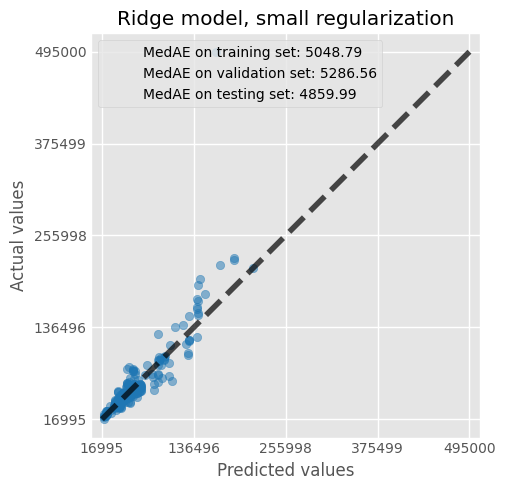

In [32]:
_, ax = plt.subplots(figsize=(5, 5))
display = PredictionErrorDisplay.from_predictions(
    y_val_orig, y_pred_val, kind="actual_vs_predicted", ax=ax, scatter_kwargs={"alpha": 0.5}
)
ax.set_title("Ridge model, small regularization")
for name, score in scores.items():
    ax.plot([], [], " ", label=f"{name}: {score}")
ax.legend(loc="upper left")
plt.tight_layout()

The model learnt is far from being a sufficiently good model when both axes keeps increasing. 

### Interpret the coefficients of the model.

In [33]:
feature_names = model[:-1].get_feature_names_out()

coefs = pd.DataFrame(
    model[-1].regressor_.coef_,
    columns=["Coefficients"],
    index=feature_names,
)

coefs

,Coefficients
year,0.000800
engine_hp,0.001259
engine_cylinders,0.018684
number_of_doors,-0.029436
highway_mpg,0.000317
city_mpg,0.001002
popularity,0.000051
make_audi,0.088115
make_bmw,-0.000000
make_chrysler,-0.000893


The explanation of coefficient for both highway_mpg and city_mpg is "dollar per miles per gallon", describing that the increase of 1 mpg is associated with the rise of 0.000317 mpg and 0.001002 for highway_mpg and city_mpg. Since some feature come in different natural scales, comparing the magnitude of different coefficients can be misleading.

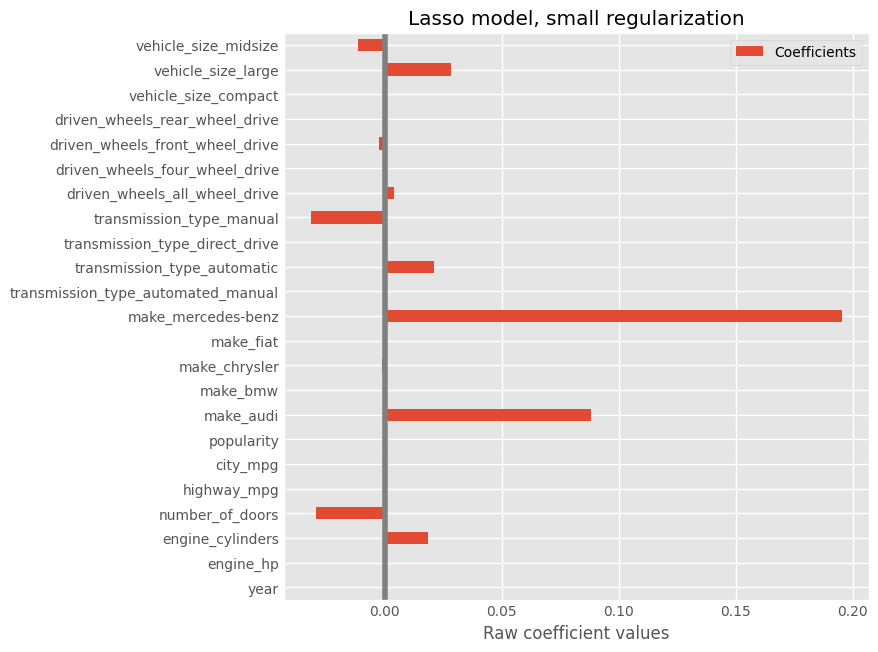

In [34]:
coefs.plot.barh(figsize=(9, 7))
plt.title("Lasso model, small regularization")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

Note that Lasso model favors solution with fewer non-zero coefficients, the model reduces the number of features upon which the given solution is dependent. This is one common techniques in feature selection.

Compraing standard deviations of different features may as well fill the gap.

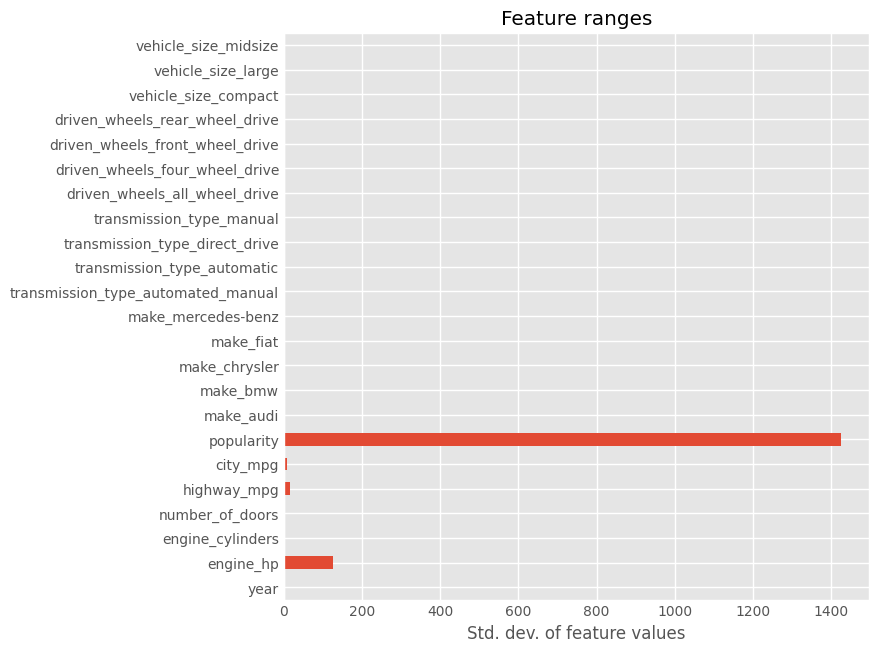

In [35]:
X_train_preprocessed = pd.DataFrame(
    model[:-1].transform(df_train), columns=feature_names
)

X_train_preprocessed.std(axis=0).plot.barh(figsize=(9, 7))
plt.title("Feature ranges")
plt.xlabel("Std. dev. of feature values")
plt.subplots_adjust(left=0.3)

By including standard deviation, the coefficient are all reduced to the same unit of measurement. 

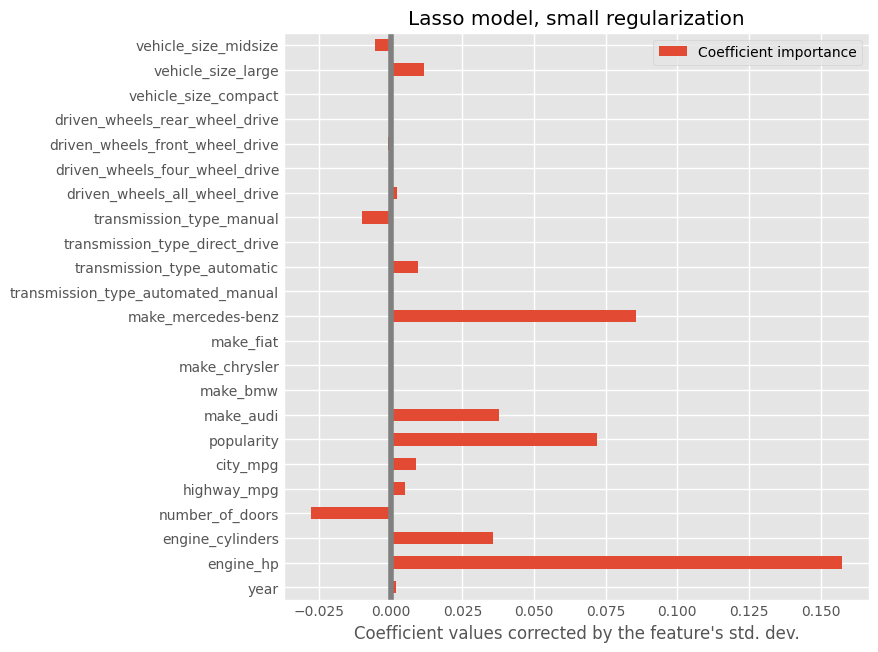

In [36]:
coefs = pd.DataFrame(
    model[-1].regressor_.coef_ * X_train_preprocessed.std(axis=0),
    columns=["Coefficient importance"],
    index=feature_names,
)
coefs.plot(kind="barh", figsize=(9, 7))
plt.xlabel("Coefficient values corrected by the feature's std. dev.")
plt.title("Lasso model, small regularization")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

Keep remind that the plot above also informs about conditional dependencies: the dependency between a feature and a target when all other features remain constant. When all features remain constant, an increase of engine_hp induce a higher msrp. In contrary, both fiat and chrysler exhibit reversal change with lower magnitude. Features that mostly influence the model are engine_hp, engine_cylinders, popularity, and mercedes-benz.

### Checking variability of the Coefficient

In [37]:
X = df_train
y = y_train_orig

In [38]:
from sklearn.model_selection import RepeatedKFold, cross_validate

cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)
cv_model = cross_validate(
    model,
    X,
    y,
    cv=cv,
    return_estimator=True,
    n_jobs=2,
)

coefs = pd.DataFrame(
    [
        est[-1].regressor_.coef_ * est[:-1].transform(X.iloc[train_idx]).std(axis=0)
        for est, (train_idx, _) in zip(cv_model["estimator"], cv.split(X, y))
    ],
    columns=feature_names,
)

In [39]:
plt.style.use('ggplot')

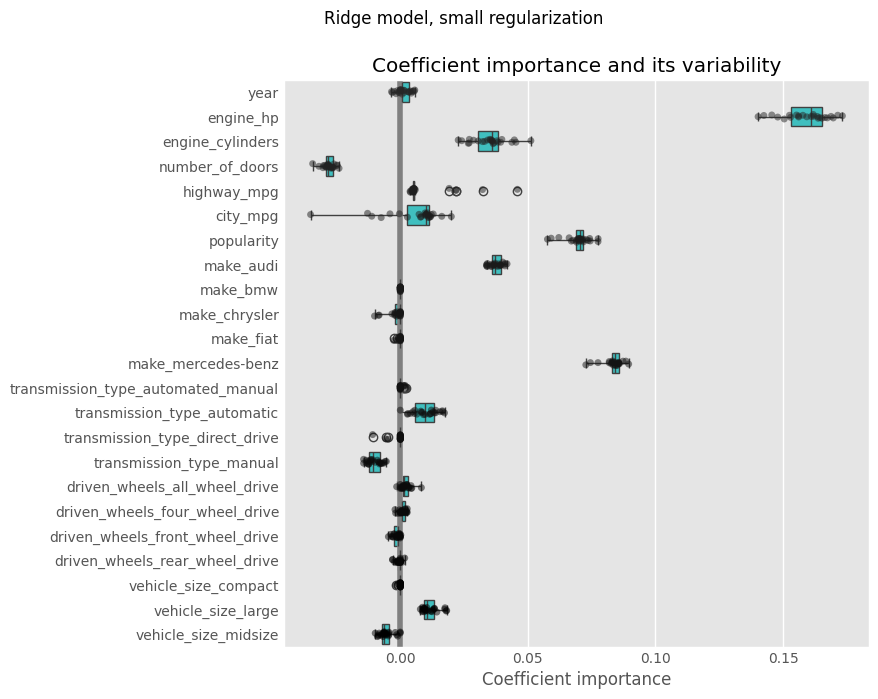

In [40]:
plt.figure(figsize=(9, 7))
sns.stripplot(data=coefs, orient="h", palette="dark:k", alpha=0.5)
sns.boxplot(data=coefs, orient="h", color="cyan", saturation=0.5, whis=10)
plt.axvline(x=0, color=".5")
plt.xlabel("Coefficient importance")
plt.title("Coefficient importance and its variability")
plt.suptitle("Ridge model, small regularization")
plt.subplots_adjust(left=0.3)

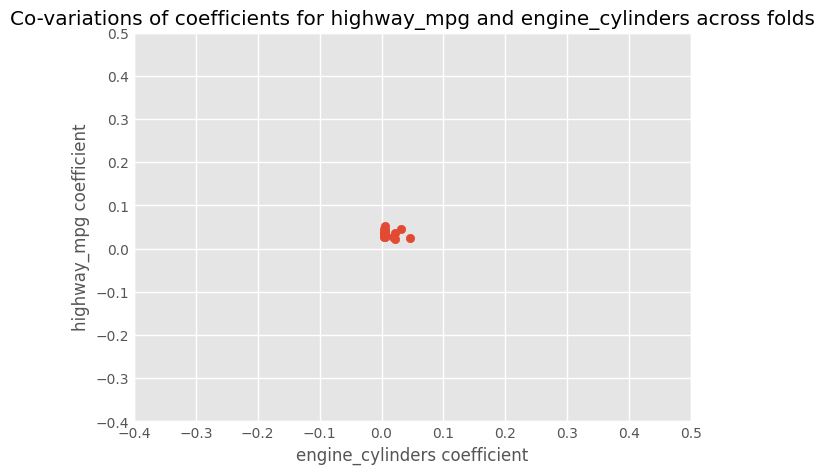

In [41]:
plt.ylabel("highway_mpg coefficient")
plt.xlabel("engine_cylinders coefficient")
plt.grid(True)
plt.xlim(-0.4, 0.5)
plt.ylim(-0.4, 0.5)
plt.scatter(coefs["highway_mpg"], coefs["engine_cylinders"])
_ = plt.title("Co-variations of coefficients for highway_mpg and engine_cylinders across folds")

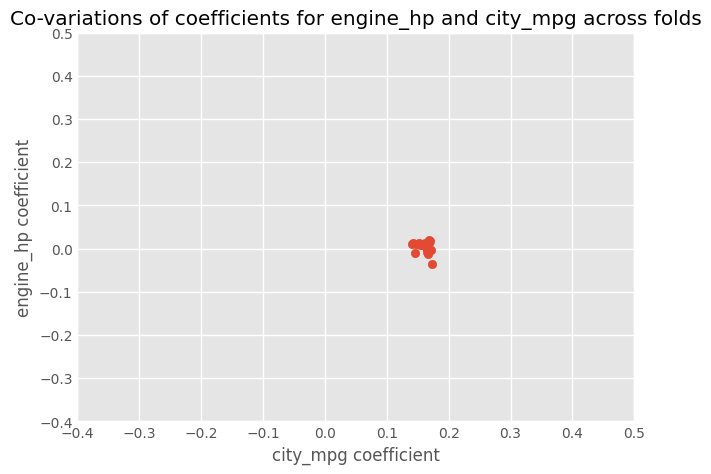

In [42]:
plt.ylabel("engine_hp coefficient")
plt.xlabel("city_mpg coefficient")
plt.grid(True)
plt.xlim(-0.4, 0.5)
plt.ylim(-0.4, 0.5)
plt.scatter(coefs["engine_hp"], coefs["city_mpg"])
_ = plt.title("Co-variations of coefficients for engine_hp and city_mpg across folds")

Let's observe its model stability if both city_mpg and highway_mpg are removed

In [43]:
X.head()

,make,year,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,highway_mpg,city_mpg,popularity
444,bmw,2016,300.0,6.0,automatic,rear_wheel_drive,2.0,midsize,31,20,3916
580,fiat,2017,160.0,4.0,automatic,front_wheel_drive,4.0,compact,30,22,819
1121,audi,2015,310.0,6.0,automatic,all_wheel_drive,4.0,large,28,18,3105
5071,mercedes-benz,2016,416.0,8.0,automatic,four_wheel_drive,4.0,midsize,14,13,617
7407,chrysler,2008,253.0,6.0,automatic,all_wheel_drive,4.0,large,22,14,1013


In [44]:
column_to_drop = ["city_mpg","highway_mpg"]
X_trim = X.drop(columns=column_to_drop)
X_trim.head()

,make,year,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,popularity
444,bmw,2016,300.0,6.0,automatic,rear_wheel_drive,2.0,midsize,3916
580,fiat,2017,160.0,4.0,automatic,front_wheel_drive,4.0,compact,819
1121,audi,2015,310.0,6.0,automatic,all_wheel_drive,4.0,large,3105
5071,mercedes-benz,2016,416.0,8.0,automatic,four_wheel_drive,4.0,midsize,617
7407,chrysler,2008,253.0,6.0,automatic,all_wheel_drive,4.0,large,1013


### Q-Q Plot

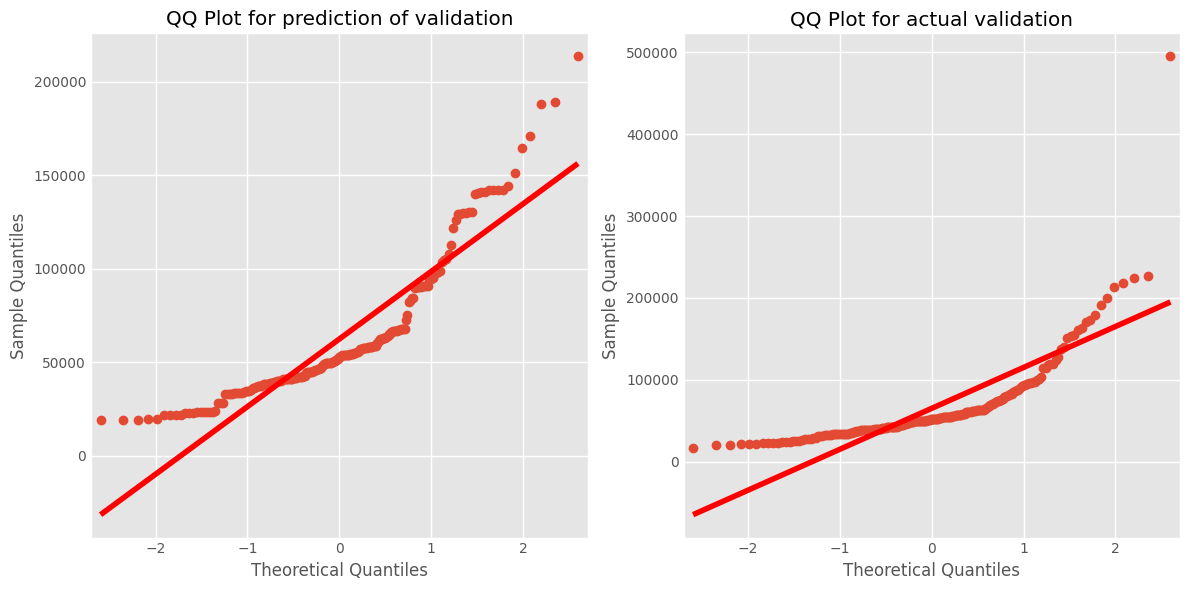

In [46]:
import statsmodels.api as sm

# Create figure and axis objects
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# QQ plot for y_pred_val
sm.qqplot(y_pred_val, line='s', ax=axes[0])
axes[0].set_title('QQ Plot for prediction of validation')

# QQ plot for y_val
sm.qqplot(y_val_orig, line='s', ax=axes[1])
axes[1].set_title('QQ Plot for actual validation')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

### Residual Plot

This plot can reveal a violation of linear regression assumptions.

In [ ]:
import statsmodels

# Create figure and axis objects
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Residual plot for engine_hp
sns.residplot(data=df_train, x="engine_hp", y="city_mpg", lowess=True, ax=axes[0, 0])
axes[0, 0].set_title('Residual Plot for engine_hp vs city_mpg')

# Residual plot for highway_mpg
sns.residplot(data=df_train, x="engine_hp", y="highway_mpg", lowess=True, ax=axes[0, 1])
axes[0, 1].set_title('Residual Plot for engine_hp vs highway_mpg')

# Residual plot for city_mpg
sns.residplot(data=df_train, x="highway_mpg", y="city_mpg", lowess=True, ax=axes[1, 0])
axes[1, 0].set_title('Residual Plot for highway_mpg vs city_mpg')

# Residual plot for engine_cylinder
sns.residplot(data=df_train, x="popularity", y="highway_mpg", lowess=True, ax=axes[1, 1])
axes[1, 1].set_title('Residual Plot for popularity vs highway_mpg')

# Adjust layout and show plots
plt.tight_layout()
plt.show()